In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lets get the data

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [3]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# Normalize
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [5]:
# Let's check the Labels in the data

pd.Series(y_train).unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8], dtype=uint8)

In [6]:
label_names = ['T-shirt/Top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneakers',
               'Bag',
               'Ankle Boot']

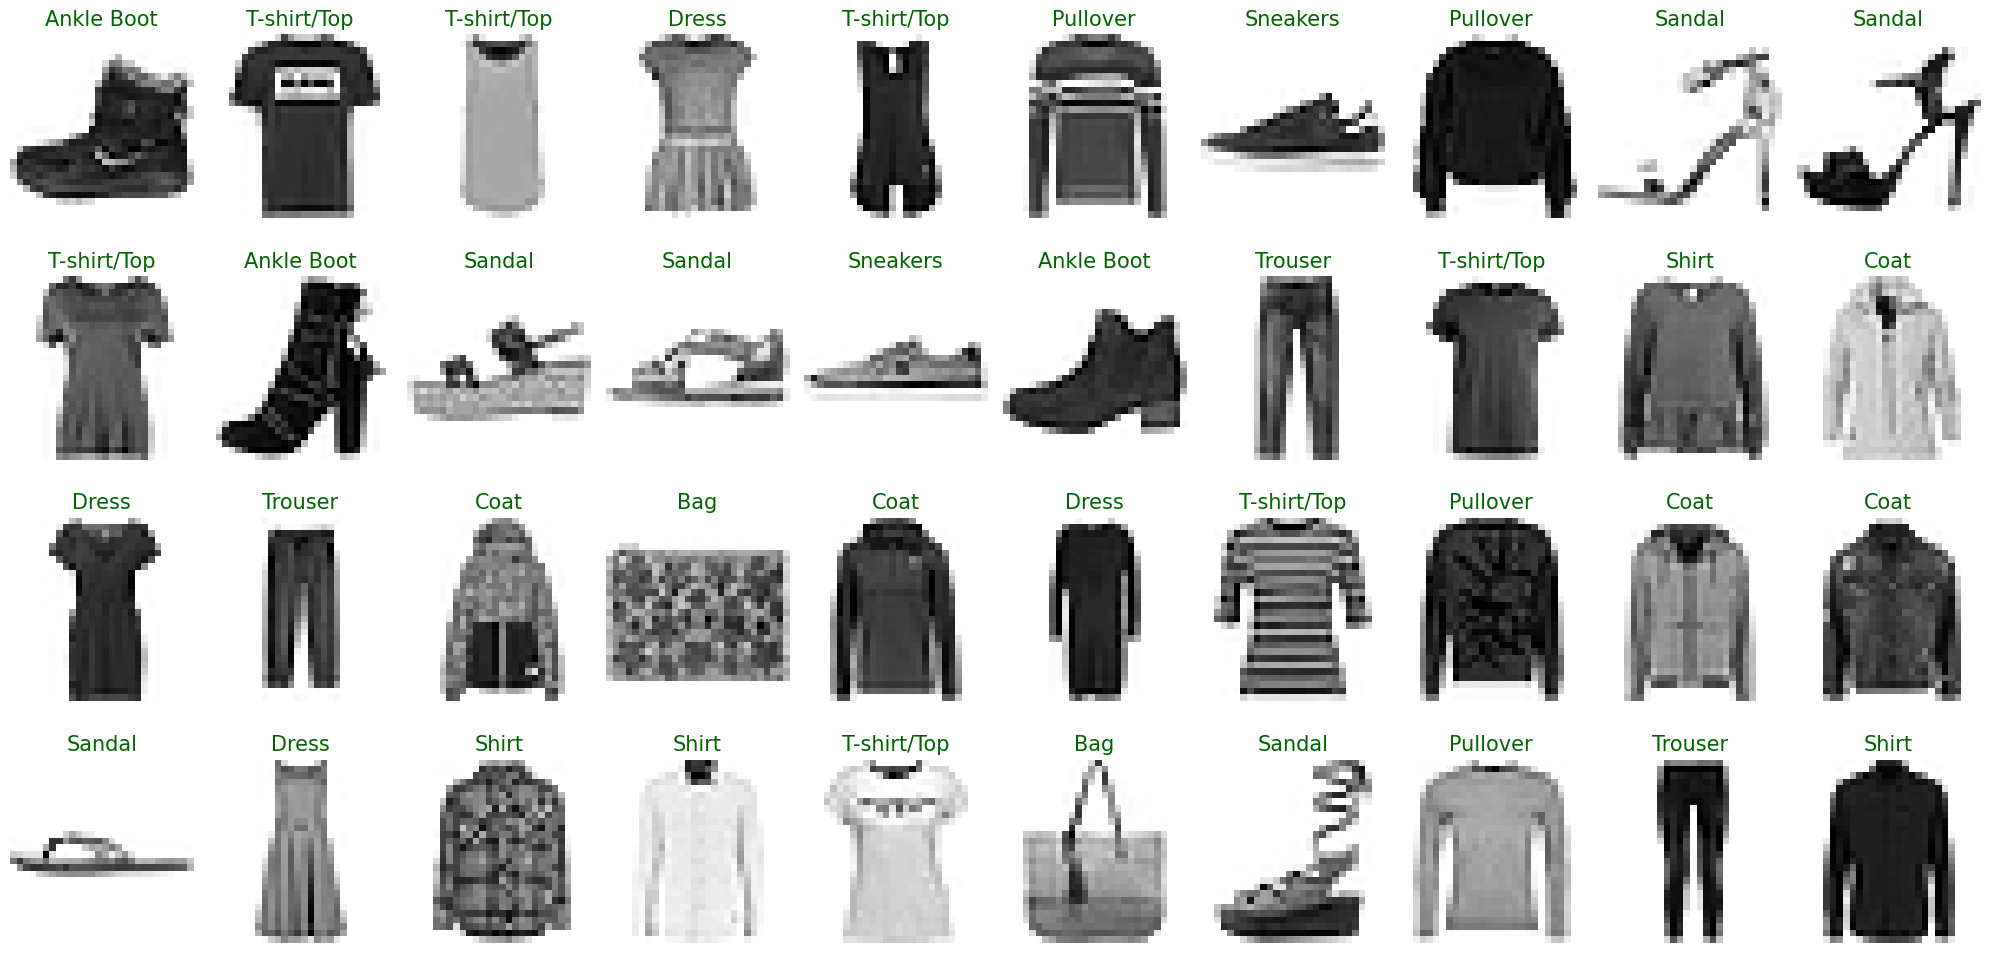

In [7]:
# See the images

nrows = 4
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_train[i],cmap='binary')
  plt.title(f'{label_names[y_train[i]]}',color='darkgreen',fontsize=15)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

## Data Preprocessing

In [8]:
x_train.min(),x_train.max()

(0.0, 1.0)

In [9]:
# We have 3D data

x_train.ndim

3

In [10]:
# Reshape the data for CNN

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

Inference: Data has been scaled

In [11]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test : (10000, 28, 28, 1)
y_test : (10000,)


## Neural Network

In [12]:
# Let's create the model

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test), batch_size=64)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5417 - accuracy: 0.8038 - val_loss: 0.3777 - val_accuracy: 0.8629
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.3581 - accuracy: 0.8696 - val_loss: 0.3245 - val_accuracy: 0.8830
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3101 - accuracy: 0.8870 - val_loss: 0.2970 - val_accuracy: 0.8935
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2804 - accuracy: 0.8979 - val_loss: 0.2797 - val_accuracy: 0.8975
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2544 - accuracy: 0.9071 - val_loss: 0.2829 - val_accuracy: 0.8964
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2358 - accuracy: 0.9127 - val_loss: 0.2678 - val_accuracy: 0.9031
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.2205 - accuracy: 0.9185 - val_loss: 0.2778 - val_accuracy: 0.8988
Epoch 

In [16]:
# Let's check accuracy on test data
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9109


[0.24825544655323029, 0.9108999967575073]

In [17]:
# Take predictions from the model

ypred=model.predict(x_test)
ypred

313/313 [==============================] - 0s 1ms/step


array([[1.17954346e-09, 1.08400434e-10, 2.62994138e-09, ...,
        1.37587749e-05, 1.66204017e-09, 9.99986172e-01],
       [6.61415072e-07, 8.69367133e-13, 9.99596179e-01, ...,
        2.11032158e-18, 5.11487588e-11, 1.33410601e-16],
       [8.28148661e-09, 1.00000000e+00, 5.68100400e-10, ...,
        5.38148884e-21, 6.63801628e-14, 5.41347558e-17],
       ...,
       [1.54332484e-11, 1.40196977e-13, 4.87352103e-11, ...,
        1.23291134e-13, 1.00000000e+00, 1.78237226e-16],
       [2.41919174e-09, 9.99999881e-01, 1.23007213e-08, ...,
        4.76498279e-16, 5.02663503e-13, 1.96374858e-13],
       [1.96430236e-04, 2.43624555e-07, 9.40203699e-06, ...,
        3.20090264e-01, 3.27609410e-03, 9.31506336e-04]], dtype=float32)

In [18]:
ypred_label =np.argmax(ypred,axis=1)

In [19]:
ypred_label

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
print('Classification Report:\n',classification_report(y_test,ypred_label))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.85      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.72      0.76      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



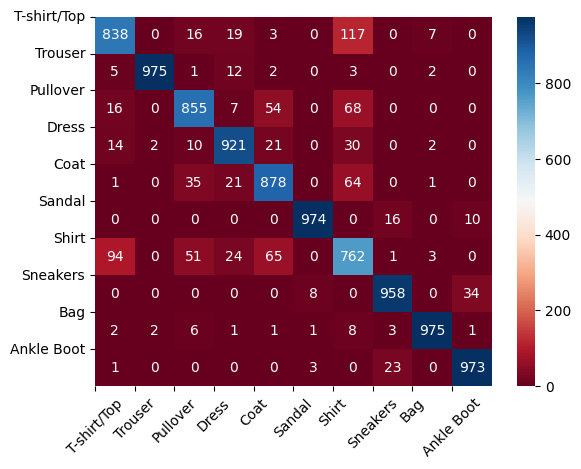

In [21]:
sns.heatmap(confusion_matrix(y_test,ypred_label),annot=True,fmt='d',cmap='RdBu')
plt.xticks(range(10),label_names,rotation=45)
plt.yticks(range(10),label_names,rotation='horizontal')
plt.show()

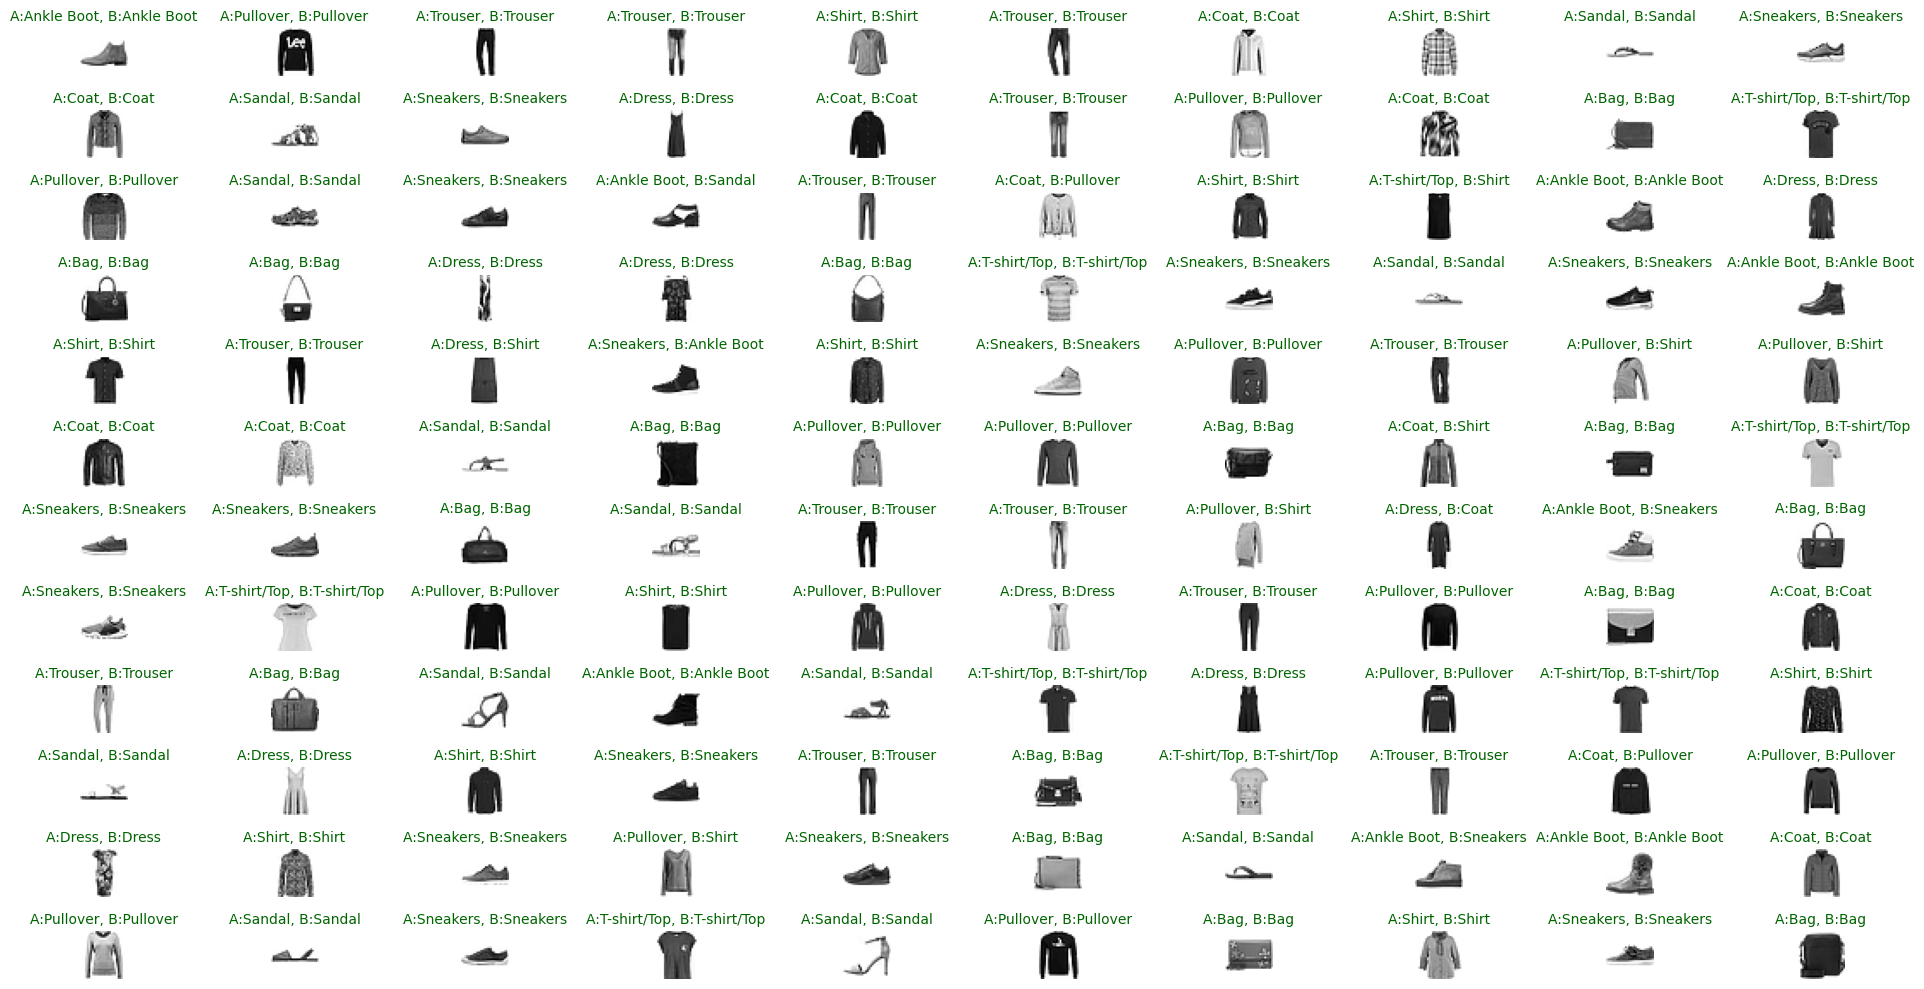

In [22]:
# See the images

nrows = 12
ncols = 10
t = 1
plt.figure(figsize=(20,10))
for i in range(nrows*ncols):
  plt.subplot(nrows,ncols,t)
  plt.imshow(x_test[i],cmap='binary')
  color = 'red' if y_test[i]!= ypred_label[i] else 'darkgreen'
  plt.title(f'A:{label_names[y_test[i]]}, B:{label_names[ypred_label[i]]}',color='darkgreen',fontsize=10)
  plt.axis('off')
  t+=1
plt.tight_layout()
plt.show()

## Saving Model

In [23]:
model.save("fashion_cnn_model.h5")

## Saving Class Labels

In [ ]:
import json

class_names = [
    "T-shirt/top","Trouser","Pullover","Dress","Coat",
    "Sandal","Shirt","Sneaker","Bag","Ankle boot"
]

with open("labels.json","w") as f:
    json.dump(class_names,f)